In [ ]:
#importing the common packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#importing modeling packages
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
#importing the model parameters or matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive/',force_remount = True)

Mounted at /content/drive/


In [ ]:
#mounting the files from google drive to colab and renaming and reading them
path1 = '/content/drive/MyDrive/DM Certifications and Documents/Cow Positions - Data Sets/E1_train.csv'
path2 = '/content/drive/MyDrive/DM Certifications and Documents/Cow Positions - Data Sets/D2_train.csv'
path3 = '/content/drive/MyDrive/DM Certifications and Documents/Cow Positions - Data Sets/W3_train.csv'
path4 = '/content/drive/MyDrive/DM Certifications and Documents/Cow Positions - Data Sets/S4_train.csv'
path5 = '/content/drive/MyDrive/DM Certifications and Documents/Cow Positions - Data Sets/L5_train.csv'
path6 ='/content/drive/MyDrive/DM Certifications and Documents/Cow Positions - Data Sets/RS6_train.csv'
path7 = '/content/drive/MyDrive/DM Certifications and Documents/Cow Positions - Data Sets/RL7_train.csv'
path8 = '/content/drive/MyDrive/DM Certifications and Documents/Cow Positions - Data Sets/G8_train.csv'
path9 = '/content/drive/MyDrive/DM Certifications and Documents/Cow Positions - Data Sets/I9_train.csv'
eating = pd.read_csv(path1)
drinking = pd.read_csv(path2)
walking = pd.read_csv(path3)
standing = pd.read_csv(path4)
lying = pd.read_csv(path5)
rs = pd.read_csv(path6)
rl = pd.read_csv(path7)
grooming = pd.read_csv(path8)
idle = pd.read_csv(path9)

#Data Exploration & Analysis

In [ ]:
#concatinating all the dataframes into a single dataframe and checking the number of rows and columns in the final dataframe
df = pd.concat([eating,drinking,walking,standing,lying,rs,rl,grooming,idle])
df.shape

(12263524, 11)

##Working with Sample df1

In [ ]:
#creating a dataframe 'df1' of 20000 records from the original dataframe df 
import random
df1 = df.sample(20000)

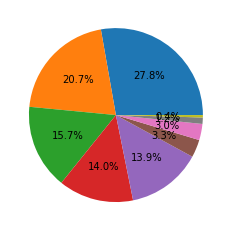

In [ ]:
#checking for the proportion of each feature in df1 and comparing it for similarity in proportion of each feature in df using piechart, using the feature ' label'
plt.pie(df['label'].value_counts(),autopct = '%1.1f%%');

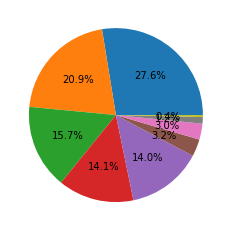

In [ ]:
plt.pie(df1['label'].value_counts(),autopct = '%1.1f%%');

**We find that the proportion of each feature in the new dataframe df1 is similar to that of the original dataframe df. Hence this sampling is good enough and we can select df1 to proceed with our model building exercise.**

**Data Visualisation and Analysis**

In [ ]:
#checking the shape of the dataframes df1
df1.shape

(20000, 11)

In [ ]:
#checking the top 5 rows of the new dataframe df1
df1.head()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
700509,1628335180,-0.108887,-0.976074,0.161133,6.896973,7.263184,-3.417969,33.0,106.5,-723.0,4
230593,1628118192,-0.308105,0.905273,0.267578,-0.122070,-12.573242,2.014160,-172.5,732.0,-399.0,6
1219842,1628131079,0.364258,-0.900391,0.255371,-0.671387,0.549316,0.427246,-690.0,-490.5,78.0,7
607088,1628082247,-0.351562,0.927734,0.120117,0.732422,-1.220703,2.380371,486.0,-312.0,559.5,7
311725,1628133508,-0.110840,0.975586,0.144043,5.859375,-3.723145,-0.610352,-300.0,775.5,-342.0,6


In [ ]:
#checking the bottom 5 rows of the new dataframe df1
df1.tail()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
319309,1628396834,0.263672,0.956543,-0.032227,-4.638672,9.765625,2.014160,-280.5,1450.5,465.0,1
644893,1628089707,0.184082,0.969727,0.141113,2.319336,-15.319824,-1.281738,-535.5,99.0,63.0,5
171054,1628334320,-0.264160,0.944336,0.166016,0.549316,-1.220703,0.549316,-55.5,1413.0,234.0,4
2151226,1628392723,0.069336,0.973145,0.134277,4.760742,12.878418,-0.671387,-201.0,153.0,295.5,4
2276168,1628106871,0.077148,0.982422,0.119629,0.732422,-1.281738,-0.671387,-483.0,1006.5,474.0,4


In [ ]:
#checking the type of data under each feature of the dataframe df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 700509 to 2276168
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    20000 non-null  int64  
 1   acc_x   20000 non-null  float64
 2   acc_y   20000 non-null  float64
 3   acc_z   20000 non-null  float64
 4   gyr_x   20000 non-null  float64
 5   gyr_y   20000 non-null  float64
 6   gyr_z   20000 non-null  float64
 7   mag_x   20000 non-null  float64
 8   mag_y   20000 non-null  float64
 9   mag_z   20000 non-null  float64
 10  label   20000 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 1.8 MB


In [ ]:
#checking for any null values under each feature of the dataframe df1
df1.isnull().sum()

time     0
acc_x    0
acc_y    0
acc_z    0
gyr_x    0
gyr_y    0
gyr_z    0
mag_x    0
mag_y    0
mag_z    0
label    0
dtype: int64

**We find that there are no missing values**

In [ ]:
#checking for the statistial parameters of the values under each feature of the dataframe df1
df1.describe()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000
mean,1.628242e+09,-0.028431,0.620354,0.109847,0.807510,-1.656216,-0.632880,-293.366625,427.17450,202.070700,4.324050
std,1.203645e+05,0.260119,0.708709,0.184624,12.026622,20.632530,9.967909,274.555162,597.34455,437.724325,2.406892
min,1.628067e+09,-1.258301,-2.704102,-1.076660,-369.506836,-318.969727,-242.553711,-1215.000000,-969.00000,-1144.500000,1.000000
25%,1.628106e+09,-0.217285,0.829102,0.033203,-2.075195,-5.798340,-2.685547,-462.000000,-48.00000,67.500000,1.000000
50%,1.628312e+09,-0.024658,0.937012,0.123535,0.854492,-1.953125,-0.610352,-252.000000,139.50000,307.500000,4.000000
75%,1.628335e+09,0.158203,0.973633,0.200684,3.662109,1.831055,1.403809,-123.000000,976.50000,550.500000,6.000000
max,1.628421e+09,1.296387,2.441406,2.180176,283.935547,820.861816,168.151855,565.500000,1795.50000,1075.500000,9.000000


In [ ]:
#the same statistical parameters in transpose format
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
time,20000.0,1.628242e+09,120364.544912,1.628067e+09,1.628106e+09,1.628312e+09,1.628335e+09,1.628421e+09
acc_x,20000.0,-2.843120e-02,0.260119,-1.258301e+00,-2.172852e-01,-2.465820e-02,1.582031e-01,1.296387e+00
acc_y,20000.0,6.203544e-01,0.708709,-2.704102e+00,8.291016e-01,9.370118e-01,9.736329e-01,2.441406e+00
acc_z,20000.0,1.098474e-01,0.184624,-1.076660e+00,3.320310e-02,1.235352e-01,2.006836e-01,2.180176e+00
gyr_x,20000.0,8.075104e-01,12.026622,-3.695068e+02,-2.075195e+00,8.544922e-01,3.662109e+00,2.839355e+02
gyr_y,20000.0,-1.656216e+00,20.632530,-3.189697e+02,-5.798340e+00,-1.953125e+00,1.831055e+00,8.208618e+02
gyr_z,20000.0,-6.328796e-01,9.967909,-2.425537e+02,-2.685547e+00,-6.103516e-01,1.403809e+00,1.681519e+02
mag_x,20000.0,-2.933666e+02,274.555162,-1.215000e+03,-4.620000e+02,-2.520000e+02,-1.230000e+02,5.655000e+02
mag_y,20000.0,4.271745e+02,597.344550,-9.690000e+02,-4.800000e+01,1.395000e+02,9.765000e+02,1.795500e+03
mag_z,20000.0,2.020707e+02,437.724325,-1.144500e+03,6.750000e+01,3.075000e+02,5.505000e+02,1.075500e+03


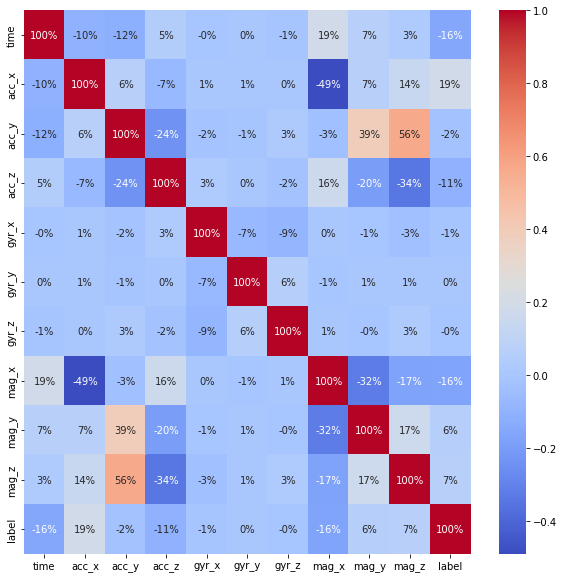

In [ ]:
#checking the correlation between all the features of df1 using heatmap
plt.figure(figsize=(10,10))
cor = df1.corr()
sns.heatmap(cor,annot = True, cmap="coolwarm", fmt = '.0%' )
plt.show()

In [ ]:
#listing down the feature names in df1
list(df1)

['time',
 'acc_x',
 'acc_y',
 'acc_z',
 'gyr_x',
 'gyr_y',
 'gyr_z',
 'mag_x',
 'mag_y',
 'mag_z',
 'label']

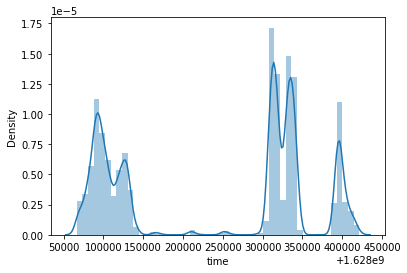

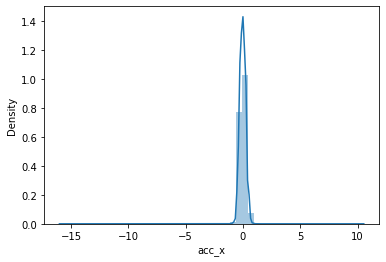

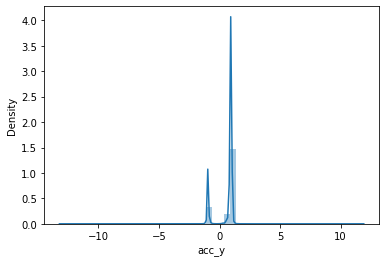

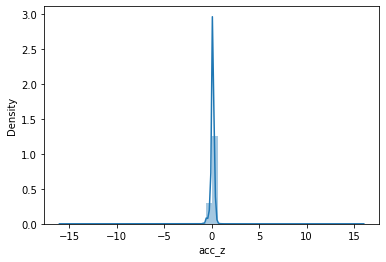

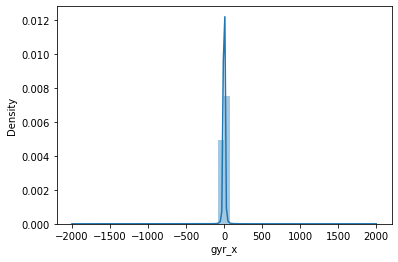

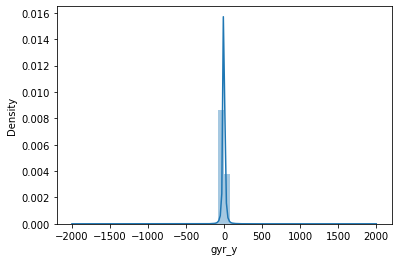

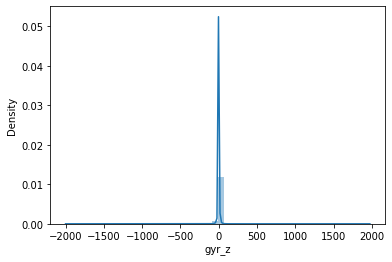

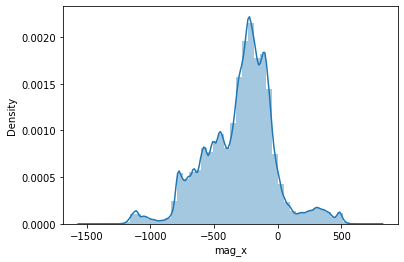

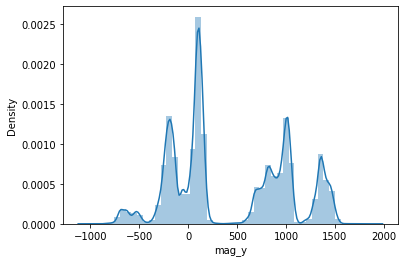

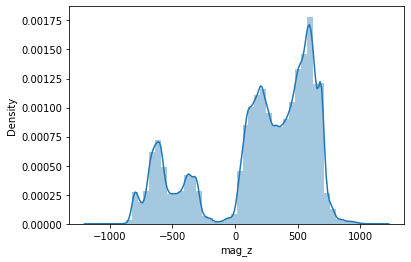

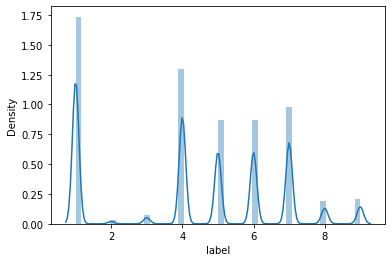

In [ ]:
#checking for the distibution of data under each feature in terms of skewness etc. using distribution plot
for column in df1.columns:
    plt.figure()             
    sns.distplot(df[column])

In [ ]:
#seperating the input and output variables into 2 different databases.
df1x = df1.drop(['label'],axis = 1)
df1x.head()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
700509,1628335180,-0.108887,-0.976074,0.161133,6.896973,7.263184,-3.417969,33.0,106.5,-723.0
230593,1628118192,-0.308105,0.905273,0.267578,-0.122070,-12.573242,2.014160,-172.5,732.0,-399.0
1219842,1628131079,0.364258,-0.900391,0.255371,-0.671387,0.549316,0.427246,-690.0,-490.5,78.0
607088,1628082247,-0.351562,0.927734,0.120117,0.732422,-1.220703,2.380371,486.0,-312.0,559.5
311725,1628133508,-0.110840,0.975586,0.144043,5.859375,-3.723145,-0.610352,-300.0,775.5,-342.0


In [ ]:
df1y = df1[['label']]
df1y.head()

,label
700509,4
230593,6
1219842,7
607088,7
311725,6


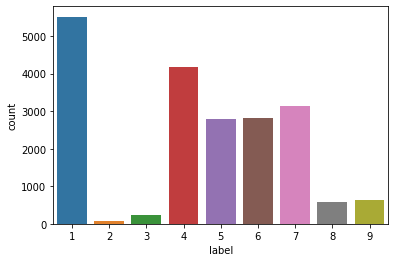

In [ ]:
#creating a countplot to check the imbalance in the output variable
sns.countplot(df1y['label'])

In [ ]:
#find out the % of each unique label values in the entire database
print('label 1:', round(df1y['label'].value_counts()[1]/len(df1y) * 100,2), '% of the database')
print('label 2:', round(df1y['label'].value_counts()[2]/len(df1y) * 100,2), '% of the database')
print('label 3:', round(df1y['label'].value_counts()[3]/len(df1y) * 100,2), '% of the dataset')
print('label 4:', round(df1y['label'].value_counts()[4]/len(df1y) * 100,2), '% of the dataset')
print('label 5:', round(df1y['label'].value_counts()[5]/len(df1y) * 100,2), '% of the dataset')
print('label 6:', round(df1y['label'].value_counts()[6]/len(df1y) * 100,2), '% of the dataset')
print('label 7:', round(df1y['label'].value_counts()[7]/len(df1y) * 100,2), '% of the dataset')
print('label 8:', round(df1y['label'].value_counts()[8]/len(df1y) * 100,2), '% of the dataset')
print('label 9:', round(df1y['label'].value_counts()[9]/len(df1y) * 100,2), '% of the dataset')

label 1: 27.56 % of the database
label 2: 0.37 % of the database
label 3: 1.21 % of the dataset
label 4: 20.93 % of the dataset
label 5: 14.01 % of the dataset
label 6: 14.08 % of the dataset
label 7: 15.66 % of the dataset
label 8: 2.96 % of the dataset
label 9: 3.22 % of the dataset


#Outlier Identification and Treatment ( Using IQR Method)

In [ ]:
#giving a common name to all the features of datafram df1x, to call them in future
column_name = ['time', 'acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'mag_x', 'mag_y', 'mag_z',]

In [ ]:
#creating a common function to identify outliers for each feature by drawing a box plot
def identify_outliers(df1x, column_name):
    fig = plt.figure(figsize=(4,2))
    sns.boxplot(data = df1x, y = column_name)
plt.show() 

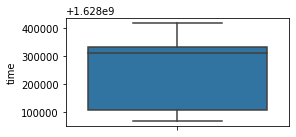

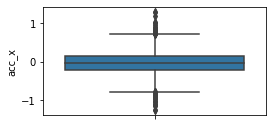

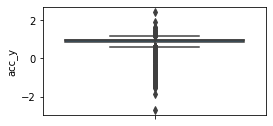

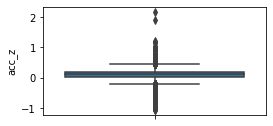

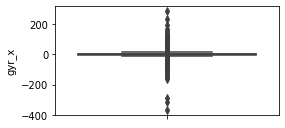

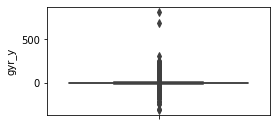

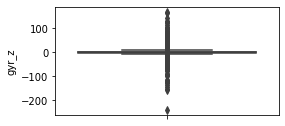

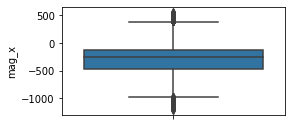

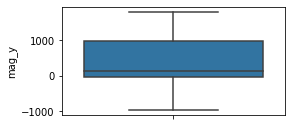

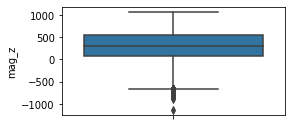

In [ ]:
#identifying the outliers for each feature by calling the common function
identify_outliers(df1x, 'time')
identify_outliers(df1x, 'acc_x')
identify_outliers(df1x, 'acc_y')
identify_outliers(df1x, 'acc_z')
identify_outliers(df1x, 'gyr_x')
identify_outliers(df1x, 'gyr_y')
identify_outliers(df1x, 'gyr_z')
identify_outliers(df1x, 'mag_x')
identify_outliers(df1x, 'mag_y')
identify_outliers(df1x, 'mag_z')

In [ ]:
#creating common function to replace outlier values with the median value and print boxplot thereafter to recheck the removal of outliers ; print upper and lower values of each feature 
#IQR
def replace_outliers(df1x, column_name):
        Q1 = np.percentile(df1x[column_name], 25)
        Q2 = np.percentile(df1x[column_name], 50)
        Q3 = np.percentile(df1x[column_name], 75)
        IQR = Q3 - Q1

        upper_val = Q3 + (1.5 * IQR)
        print('upper', upper_val)
        lower_val = Q1 - (1.5 * IQR)
        print('lower', lower_val)

        df1x.loc[df1x[column_name] > upper_val, column_name] = np.median(df1x[column_name])
        df1x.loc[df1x[column_name] < lower_val, column_name] = np.median(df1x[column_name])
        
        fig = plt.figure(figsize = (4,2))
        sns.boxplot(data = df1x,y = column_name)
        plt.xticks(rotation = 'horizontal')
        plt.show()

upper 1628678095.125
lower 1627762672.125


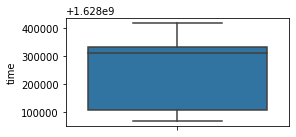

upper 0.72143555
lower -0.78051765


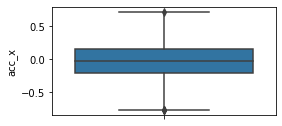

upper 1.1904298500000001
lower 0.61230465


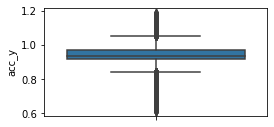

upper 0.45190434999999995
lower -0.21801765


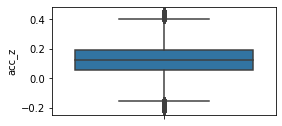

upper 12.268066450000001
lower -10.681152350000001


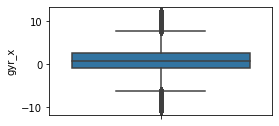

upper 13.27514645
lower -17.24243155


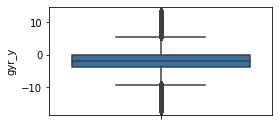

upper 7.5378418499999995
lower -8.81958015


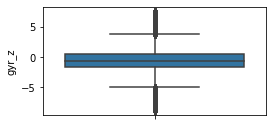

upper 385.5
lower -970.5


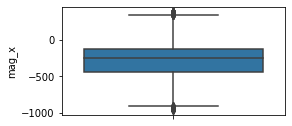

upper 2513.25
lower -1584.75


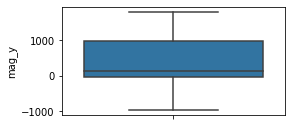

upper 1275.0
lower -657.0


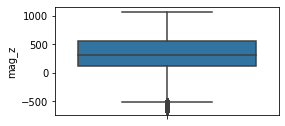

In [ ]:
#recalling the common function for replacing the outliers in each feature with median value and visualising using boxplot
replace_outliers(df1x, 'time')
replace_outliers(df1x, 'acc_x')
replace_outliers(df1x, 'acc_y')
replace_outliers(df1x, 'acc_z')
replace_outliers(df1x, 'gyr_x')
replace_outliers(df1x, 'gyr_y')
replace_outliers(df1x, 'gyr_z')
replace_outliers(df1x, 'mag_x')
replace_outliers(df1x, 'mag_y')
replace_outliers(df1x, 'mag_z')

#Data Normalisation




In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
df1x_normalised = pd.DataFrame(scaling.fit_transform(df1x),columns = df1x.columns)
df1x_normalised.head()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
0,0.757019,0.447737,0.562130,0.566010,0.765957,0.803607,0.329588,0.740044,0.389040,0.556710
1,0.145501,0.314881,0.507185,0.725018,0.460106,0.152305,0.662921,0.588496,0.615301,0.148918
2,0.181820,0.763269,0.562130,0.706783,0.436170,0.583166,0.565543,0.206858,0.173087,0.424242
3,0.044201,0.285900,0.546069,0.504741,0.497340,0.525050,0.685393,0.529867,0.237656,0.702165
4,0.188665,0.446434,0.628910,0.540481,0.720745,0.442886,0.501873,0.494469,0.631036,0.181818


#Feature Selection - KBest using Chi2 tests

In [ ]:
#importing the KBest and Chi2 packages
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
#ranking the features
select_k_best_rank_features = SelectKBest(score_func = chi2, k = 5)
k_best_features = select_k_best_rank_features.fit(df1x_normalised,df1y)

df_k_scores = pd.DataFrame(k_best_features.scores_, columns = ['score'])
dfcolumns = pd.DataFrame(df1x_normalised.columns)

k_best_feature_rank = pd.concat([dfcolumns, df_k_scores], axis = 1)

k_best_feature_rank.columns = ('features', 'k_score')
print(k_best_feature_rank.nlargest(10, 'k_score'))

  features     k_score
0     time  874.881903
1    acc_x  247.421563
7    mag_x  168.932281
8    mag_y  119.335553
3    acc_z   73.884975
2    acc_y   54.880115
9    mag_z   31.717841
5    gyr_y    1.369495
4    gyr_x    1.256267
6    gyr_z    0.339655


#Feature Selection using Mutual Info. Classifier

time     1.301511
mag_y    0.431762
mag_x    0.288137
acc_x    0.271849
mag_z    0.209176
gyr_z    0.160537
gyr_y    0.158917
gyr_x    0.139992
acc_z    0.121892
acc_y    0.121367
dtype: float64


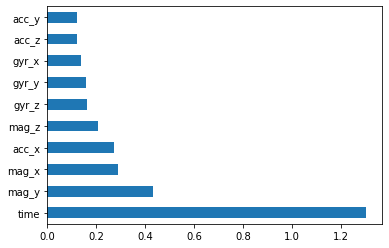

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(df1x_normalised, df1y)

mutual_data = pd.Series(mutual_info, index = df1x_normalised.columns)
mutual_data.sort_values(ascending = False)

print(mutual_data.nlargest(10))

mutual_data.nlargest(10).plot(kind = 'barh')
plt.show()

**From the above 2 methods of feature selection, we can find that the insignificant features are gyr_x, gyr_y, gyr_z , acc_y and mag_z. Hence we need to drop these features while we create the models**

In [ ]:
#dropping the insignificant features
df1x_normalised.drop(['acc_y','gyr_x','gyr_y','gyr_z','mag_z'],inplace = True, axis = 1)

In [ ]:
#checking if the insignificant features are dropped
df1x_normalised.head()

,time,acc_x,acc_z,mag_x,mag_y
0,0.757019,0.447737,0.566010,0.740044,0.389040
1,0.145501,0.314881,0.725018,0.588496,0.615301
2,0.181820,0.763269,0.706783,0.206858,0.173087
3,0.044201,0.285900,0.504741,0.529867,0.237656
4,0.188665,0.446434,0.540481,0.494469,0.631036


#Splitting the data into Training and Testing data

In [ ]:
#splitting the data into train and combined data(test data +validation data) in 80-20 ratio
from sklearn.model_selection import train_test_split
X_train,X_combine,Y_train,Y_combine = train_test_split(df1x_normalised,df1y,train_size=0.80, random_state=500)
X_train.shape,X_combine.shape,Y_train.shape,Y_combine.shape


((16000, 5), (4000, 5), (16000, 1), (4000, 1))

In [ ]:
#splitting the data into train and combined data(test data +validation data) in 50-50 ratio
from sklearn.model_selection import train_test_split
X_train,X_combine,Y_train,Y_combine = train_test_split(df1x_normalised,df1y,train_size=0.50, random_state=500)
X_train.shape,X_combine.shape,Y_train.shape,Y_combine.shape

((2000, 5), (2000, 5), (2000, 1), (2000, 1))

#Build Model - Support Vector Classifier for df1

In [ ]:
#We use Support Vector classifier as a classifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [ ]:
# training the classifier using X_Train and Y_train 
clf = SVC(kernel = 'linear').fit(X_train,Y_train)
clf.predict(X_train)

array([1, 1, 1, ..., 4, 4, 1])

In [ ]:
# testing the model using X_test and storing the output in y_pred
Y_pred = clf.predict(X_test)

**Model Evaluation - SVC**

In [ ]:
# importing and creating a confusion matrix,which compares the Y_test and y_pred values

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print ('Confusion\n')
print (cm)

Confusion

[[345   0   0 225   8   0   6   0   0]
 [  3   0   0   2   1   0   1   0   0]
 [ 13   0   0   2   2   0   3   0   0]
 [121   0   0 280  16   1  12   0   0]
 [ 55   0   0  56  63   1  89   0   0]
 [126   0   0 138   1   3  11   0   0]
 [ 65   0   0  54  39   1 136   0   0]
 [ 29   0   0  27   2   0   2   0   0]
 [ 55   0   0   3   2   0   1   0   0]]


In [ ]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(Y_test, Y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(Y_test, Y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(Y_test, Y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(Y_test, Y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(Y_test, Y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(Y_test, Y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(Y_test, Y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(Y_test, Y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(Y_test, Y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(Y_test, Y_pred))


Accuracy: 0.41

Micro Precision: 0.41
Micro Recall: 0.41
Micro F1-score: 0.41

Macro Precision: 0.25
Macro Recall: 0.22
Macro F1-score: 0.20

Weighted Precision: 0.41
Weighted Recall: 0.41
Weighted F1-score: 0.36

Classification Report

              precision    recall  f1-score   support

           1       0.42      0.59      0.49       584
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        20
           4       0.36      0.65      0.46       430
           5       0.47      0.24      0.32       264
           6       0.50      0.01      0.02       279
           7       0.52      0.46      0.49       295
           8       0.00      0.00      0.00        60
           9       0.00      0.00      0.00        61

    accuracy                           0.41      2000
   macro avg       0.25      0.22      0.20      2000
weighted avg       0.41      0.41      0.36      2000



Grid Search - Support Vector Classifier

In [ ]:
param_grid = {'C' :[0.1,1,10,100,1000], 'gamma' :[0.1,0.01,0.001,0.0001], 'kernel':['rbf']}

In [ ]:
#cross-validation
from sklearn.model_selection import GridSearchCV

In [ ]:
#an estimator like SVC and creates a new estimator that behaves exactly the same 
grid = GridSearchCV(SVC(),param_grid,refit = True,verbose = 5)

In [ ]:
#fitting the grid into the training dataset
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.379 total time=  13.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.375 total time=  13.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.381 total time=  15.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.385 total time=  13.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.381 total time=  13.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.282 total time=  14.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.282 total time=  14.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.282 total time=  14.2s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.282 total time=  14.1s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.282 total time=  14.1s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.282 total time=  13.8s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=5)

Inspect the best parameters found by GridSearchCV in the best_params_attribute and the best estimator in best_estimator_attribute :

In [ ]:
grid.best_params_

NameError: ignored

In [ ]:
grid.best_estimator_

SVC(C=1000, gamma=0.1)

In [ ]:
#Re-run predictions on this grid object 
grid_predictions = grid.predict(X_test)

In [ ]:
print(confusion_matrix(Y_test,grid_predictions))

[[449   0   0  65   2   6   5   0   6]
 [  0   0   2   1   1   1   0   0   0]
 [  7   0   7   0   2   1   1   0   1]
 [158   0   0 260   2   3  17   0   0]
 [ 23   0   0  12 160   5  91   0   0]
 [147   0   0  88   2  55   3   0   1]
 [ 59   0   0   9  39   1 179   0   0]
 [ 25   0   4  28   5   0   0   0   3]
 [  3   0   0  12   1   0   0   0  48]]


In [ ]:
#recalculation of the evaluation parameters
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(Y_test, grid_predictions)))

print('Micro Precision: {:.2f}'.format(precision_score(Y_test,grid_predictions, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(Y_test,grid_predictions, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(Y_test,grid_predictions, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(Y_test,grid_predictions, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(Y_test,grid_predictions, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(Y_test,grid_predictions, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(Y_test,grid_predictions, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(Y_test,grid_predictions, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(Y_test,grid_predictions, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(Y_test,grid_predictions))


Accuracy: 0.58

Micro Precision: 0.58
Micro Recall: 0.58
Micro F1-score: 0.58

Macro Precision: 0.50
Macro Recall: 0.43
Macro F1-score: 0.44

Weighted Precision: 0.60
Weighted Recall: 0.58
Weighted F1-score: 0.55

Classification Report

              precision    recall  f1-score   support

           1       0.52      0.84      0.64       533
           2       0.00      0.00      0.00         5
           3       0.54      0.37      0.44        19
           4       0.55      0.59      0.57       440
           5       0.75      0.55      0.63       291
           6       0.76      0.19      0.30       296
           7       0.60      0.62      0.61       287
           8       0.00      0.00      0.00        65
           9       0.81      0.75      0.78        64

    accuracy                           0.58      2000
   macro avg       0.50      0.43      0.44      2000
weighted avg       0.60      0.58      0.55      2000



#Build Model - Random Forest Classifier for df1

In [ ]:
#model training on training data and predicting for test data
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy' , random_state = 500)
rfc.fit(X_train , Y_train)
Y_pred = rfc.predict(X_test)

**Model Evaluation - Random Forest**




In [ ]:
# importing and creating a confusion matrix,which compares the Y_test and y_pred values

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print ('Confusion\n')
print (cm)

Confusion

[[554   0   0  24   2   3   0   1   0]
 [  0   5   1   1   0   0   0   0   0]
 [  1   0  15   0   2   1   0   1   0]
 [ 30   0   0 383   2   7   1   7   0]
 [  1   0   0   2 257   1   3   0   0]
 [  7   0   0  22   1 247   1   1   0]
 [  1   0   0   2   4   1 287   0   0]
 [  7   0   0  18   1   0   1  32   1]
 [  0   0   0   1   0   0   1   1  58]]


In [ ]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(Y_test, Y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(Y_test, Y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(Y_test, Y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(Y_test, Y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(Y_test, Y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(Y_test, Y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(Y_test, Y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(Y_test, Y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(Y_test, Y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(Y_test, Y_pred))


Accuracy: 0.93

Micro Precision: 0.93
Micro Recall: 0.93
Micro F1-score: 0.93

Macro Precision: 0.89
Macro Recall: 0.82
Macro F1-score: 0.85

Weighted Precision: 0.92
Weighted Recall: 0.93
Weighted F1-score: 0.92

Classification Report

              precision    recall  f1-score   support

           1       0.92      0.96      0.94       533
           2       0.60      0.60      0.60         5
           3       0.92      0.58      0.71        19
           4       0.88      0.92      0.90       440
           5       0.95      0.97      0.96       291
           6       0.94      0.88      0.91       296
           7       0.97      0.97      0.97       287
           8       0.87      0.51      0.64        65
           9       0.97      0.98      0.98        64

    accuracy                           0.93      2000
   macro avg       0.89      0.82      0.85      2000
weighted avg       0.92      0.93      0.92      2000



#Checking if the evaluation parameter scores can be bettered if imbalance of output values is cancelled using Oversampling method (SMOTE)

*SMOTE - Synthetic Minority Oversampling Technique is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.*

In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#checking the count of each 'label' in Y_train before SMOTE
df1y , count = np.unique(Y_train,return_counts = True)
Y_train_dict_value_count = { k:v for (k,v) in zip(df1x_normalised , count)}
Y_train_dict_value_count

{1: 4519, 2: 71, 3: 197, 4: 3242, 5: 2263, 6: 2177, 7: 2514, 8: 441, 9: 576}

In [ ]:
#importing the SMOTE package and fitting the same for the test and train data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 10)

X_train_smote, Y_train_smote = smote.fit_resample(X_train,Y_train)

In [ ]:
#checking the count of each 'label' in Y_train after SMOTE
df1y , count = np.unique(Y_train_smote,return_counts = True)
Y_train_smote_value_count = { k:v for (k,v) in zip(df1x_normalised , count)}
Y_train_smote_value_count

{1: 4519,
 2: 4519,
 3: 4519,
 4: 4519,
 5: 4519,
 6: 4519,
 7: 4519,
 8: 4519,
 9: 4519}

#Model Building using SVC after SMOTE 

In [ ]:
# fitting the classifier for X_Train_smote and Y_train_smote values and defining the prediction
clf = SVC(kernel = 'linear').fit(X_train_smote,Y_train_smote)
clf.predict(X_train)

# testing the model using X_test and storing the output in y_pred
Y_pred = clf.predict(X_test)

Evaluating the model built on SVC , after SMOTE is done





In [ ]:
# importing and creating a confusion matrix,which compares the Y_test and y_pred values

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print ('Confusion\n')
print (cm)

Confusion

[[ 43  52  58 224  14   5   5  65  67]
 [  0   2   1   1   0   1   0   0   0]
 [  2   8   2   1   1   0   3   0   2]
 [ 14  15  11 299  14   1  12  73   1]
 [  3  43   9  34  70   0 101  31   0]
 [  2  34  23 141   0  46   6  28  16]
 [ 13  41  21  29  51   7  97  28   0]
 [  2   7   3  14   2   0   0  37   0]
 [  3   1   0   0   1   0   0  11  48]]


In [ ]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(Y_test, Y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(Y_test, Y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(Y_test, Y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(Y_test, Y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(Y_test, Y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(Y_test, Y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(Y_test, Y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(Y_test, Y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(Y_test, Y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(Y_test, Y_pred))


Accuracy: 0.32

Micro Precision: 0.32
Micro Recall: 0.32
Micro F1-score: 0.32

Macro Precision: 0.34
Macro Recall: 0.37
Macro F1-score: 0.26

Weighted Precision: 0.49
Weighted Recall: 0.32
Weighted F1-score: 0.31

Classification Report

              precision    recall  f1-score   support

           1       0.52      0.08      0.14       533
           2       0.01      0.40      0.02         5
           3       0.02      0.11      0.03        19
           4       0.40      0.68      0.51       440
           5       0.46      0.24      0.32       291
           6       0.77      0.16      0.26       296
           7       0.43      0.34      0.38       287
           8       0.14      0.57      0.22        65
           9       0.36      0.75      0.48        64

    accuracy                           0.32      2000
   macro avg       0.34      0.37      0.26      2000
weighted avg       0.49      0.32      0.31      2000



#Model Building using Random Forest after SMOTE 

---



In [ ]:
#model training on training data and predicting for test data
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy' , random_state = 500)
rfc.fit(X_train_smote , Y_train_smote)
Y_pred = rfc.predict(X_test)

**Model Evaluation - Random Forest**





In [ ]:
# importing and creating a confusion matrix,which compares the Y_test and Y_pred values

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print ('Confusion\n')
print (cm)

Confusion

[[489   0   2  26   0   7   0   9   0]
 [  0   3   1   1   0   0   0   0   0]
 [  1   5   9   2   1   0   1   0   0]
 [ 28   0   2 369   3  18   3  16   1]
 [  2   0   1   1 282   0   5   0   0]
 [  6   2   2  17   0 264   1   4   0]
 [  0   0   0   2  11   0 273   0   1]
 [ 10   1   0  11   1   1   0  40   1]
 [  0   0   0   0   0   0   0   0  64]]


In [ ]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(Y_test, Y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(Y_test, Y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(Y_test, Y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(Y_test, Y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(Y_test, Y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(Y_test, Y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(Y_test, Y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(Y_test, Y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(Y_test, Y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(Y_test, Y_pred))


Accuracy: 0.90

Micro Precision: 0.90
Micro Recall: 0.90
Micro F1-score: 0.90

Macro Precision: 0.77
Macro Recall: 0.81
Macro F1-score: 0.78

Weighted Precision: 0.90
Weighted Recall: 0.90
Weighted F1-score: 0.90

Classification Report

              precision    recall  f1-score   support

           1       0.91      0.92      0.91       533
           2       0.27      0.60      0.37         5
           3       0.53      0.47      0.50        19
           4       0.86      0.84      0.85       440
           5       0.95      0.97      0.96       291
           6       0.91      0.89      0.90       296
           7       0.96      0.95      0.96       287
           8       0.58      0.62      0.60        65
           9       0.96      1.00      0.98        64

    accuracy                           0.90      2000
   macro avg       0.77      0.81      0.78      2000
weighted avg       0.90      0.90      0.90      2000

